<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.062709,51.476250,88.691845,0.000614,243.231418,243.230935,0.000482
1,0.0,1.0,89.270002,33.527407,46.745690,-0.001135,179.541964,179.542959,-0.000995
2,0.0,2.0,49.400326,33.035152,88.704256,0.000117,181.139851,181.139860,-0.000010
3,0.0,3.0,39.651183,83.607242,38.673814,0.000237,171.932477,171.932189,0.000288
4,0.0,4.0,41.383203,83.369073,22.045578,-0.000144,156.797710,156.797707,0.000004
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.432246,20.061522,75.186159,-0.002355,196.677573,196.679500,-0.001927
59996,999.0,56.0,96.454521,25.346948,96.689162,-0.003778,228.486854,228.489988,-0.003135
59997,999.0,57.0,34.007986,70.583328,90.028480,-0.000277,204.619517,204.619784,-0.000268
59998,999.0,58.0,59.341899,48.974696,75.058920,-0.000267,193.375249,193.375392,-0.000143


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.062709,51.476250,88.691845,0.000614,243.231418,243.230935,0.000482
1,0.0,1.0,89.270002,33.527407,46.745690,-0.001135,179.541964,179.542959,-0.000995
2,0.0,2.0,49.400326,33.035152,88.704256,0.000117,181.139851,181.139860,-0.000010
3,0.0,3.0,39.651183,83.607242,38.673814,0.000237,171.932477,171.932189,0.000288
4,0.0,4.0,41.383203,83.369073,22.045578,-0.000144,156.797710,156.797707,0.000004
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.432246,20.061522,75.186159,-0.002355,196.677573,196.679500,-0.001927
59996,999.0,56.0,96.454521,25.346948,96.689162,-0.003778,228.486854,228.489988,-0.003135
59997,999.0,57.0,34.007986,70.583328,90.028480,-0.000277,204.619517,204.619784,-0.000268
59998,999.0,58.0,59.341899,48.974696,75.058920,-0.000267,193.375249,193.375392,-0.000143


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    93.062709  51.476250  88.691845  0.000614  243.231418   
      1.0    89.270002  33.527407  46.745690 -0.001135  179.541964   
      2.0    49.400326  33.035152  88.704256  0.000117  181.139851   
      3.0    39.651183  83.607242  38.673814  0.000237  171.932477   
      4.0    41.383203  83.369073  22.045578 -0.000144  156.797710   
...                ...        ...        ...       ...         ...   
999.0 55.0   91.432246  20.061522  75.186159 -0.002355  196.677573   
      56.0   96.454521  25.346948  96.689162 -0.003778  228.486854   
      57.0   34.007986  70.583328  90.028480 -0.000277  204.619517   
      58.0   59.341899  48.974696  75.058920 -0.000267  193.375249   
      59.0   41.579053  70.206632  85.868185  0.000178  207.654047   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.230935  0.000482  
      1.0    179.542959 -0.000995  
      2.0    181.139860 -0.000010  
      3.0    171.932189  0.000288  
      4.0    156.797707  0.000004  
...                 ...       ...  
999.0 55.0   196.679500 -0.001927  
      56.0   228.489988 -0.003135  
      57.0   204.619784 -0.000268  
      58.0   193.375392 -0.000143  
      59.0   207.653830  0.000217  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    93.062709  51.476250  88.691845  0.000614  243.231418   
      1.0    89.270002  33.527407  46.745690 -0.001135  179.541964   
      2.0    49.400326  33.035152  88.704256  0.000117  181.139851   
      3.0    39.651183  83.607242  38.673814  0.000237  171.932477   
      4.0    41.383203  83.369073  22.045578 -0.000144  156.797710   
...                ...        ...        ...       ...         ...   
999.0 55.0   91.432246  20.061522  75.186159 -0.002355  196.677573   
      56.0   96.454521  25.346948  96.689162 -0.003778  228.486854   
      57.0   34.007986  70.583328  90.028480 -0.000277  204.619517   
      58.0   59.341899  48.974696  75.058920 -0.000267  193.375249   
      59.0   41.579053  70.206632  85.868185  0.000178  207.654047   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.230935  0.000482  
      1.0    179.542959 -0.000995  
      2.0    181.139860 -0.000010  
      3.0    171.932189  0.000288  
      4.0    156.797707  0.000004  
...                 ...       ...  
999.0 55.0   196.679500 -0.001927  
      56.0   228.489988 -0.003135  
      57.0   204.619784 -0.000268  
      58.0   193.375392 -0.000143  
      59.0   207.653830  0.000217  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.062709,51.476250,88.691845,0.000614,243.231418,243.230935,0.000482
1,0.0,1.0,89.270002,33.527407,46.745690,-0.001135,179.541964,179.542959,-0.000995
2,0.0,2.0,49.400326,33.035152,88.704256,0.000117,181.139851,181.139860,-0.000010
3,0.0,3.0,39.651183,83.607242,38.673814,0.000237,171.932477,171.932189,0.000288
4,0.0,4.0,41.383203,83.369073,22.045578,-0.000144,156.797710,156.797707,0.000004
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.432246,20.061522,75.186159,-0.002355,196.677573,196.679500,-0.001927
59996,999.0,56.0,96.454521,25.346948,96.689162,-0.003778,228.486854,228.489988,-0.003135
59997,999.0,57.0,34.007986,70.583328,90.028480,-0.000277,204.619517,204.619784,-0.000268
59998,999.0,58.0,59.341899,48.974696,75.058920,-0.000267,193.375249,193.375392,-0.000143


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    93.062709  51.476250  88.691845  0.000614  243.231418   
      1.0    89.270002  33.527407  46.745690 -0.001135  179.541964   
      2.0    49.400326  33.035152  88.704256  0.000117  181.139851   
      3.0    39.651183  83.607242  38.673814  0.000237  171.932477   
      4.0    41.383203  83.369073  22.045578 -0.000144  156.797710   
...                ...        ...        ...       ...         ...   
999.0 55.0   91.432246  20.061522  75.186159 -0.002355  196.677573   
      56.0   96.454521  25.346948  96.689162 -0.003778  228.486854   
      57.0   34.007986  70.583328  90.028480 -0.000277  204.619517   
      58.0   59.341899  48.974696  75.058920 -0.000267  193.375249   
      59.0   41.579053  70.206632  85.868185  0.000178  207.654047   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.230935  0.000482  
      1.0    179.542959 -0.000995  
      2.0    181.139860 -0.000010  
      3.0    171.932189  0.000288  
      4.0    156.797707  0.000004  
...                 ...       ...  
999.0 55.0   196.679500 -0.001927  
      56.0   228.489988 -0.003135  
      57.0   204.619784 -0.000268  
      58.0   193.375392 -0.000143  
      59.0   207.653830  0.000217  

[60000 rows x 7 columns]

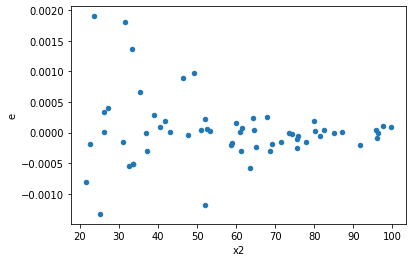

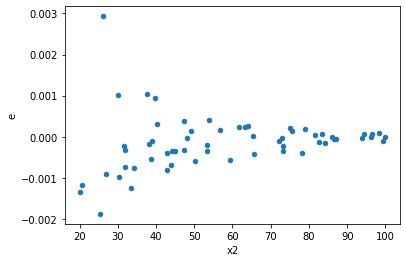

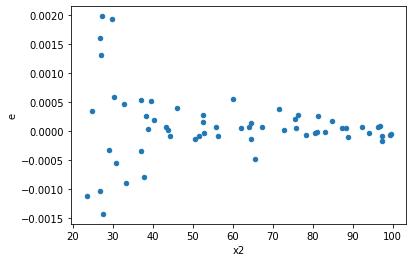

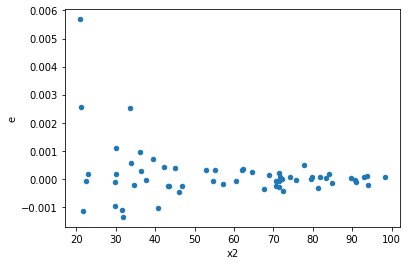

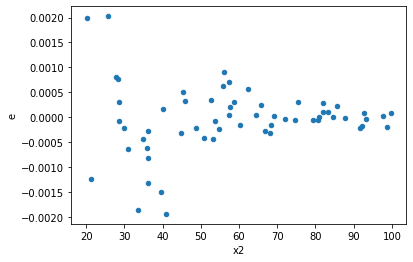

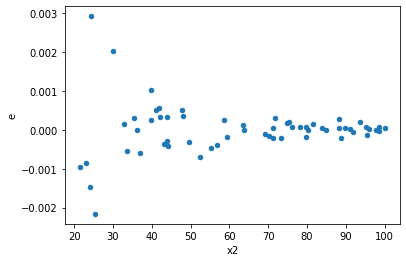

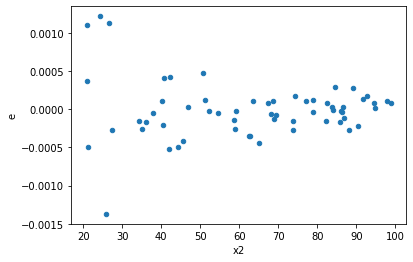

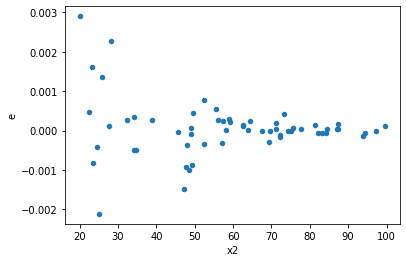

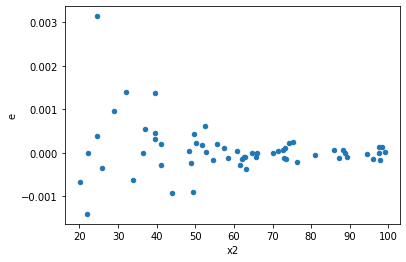

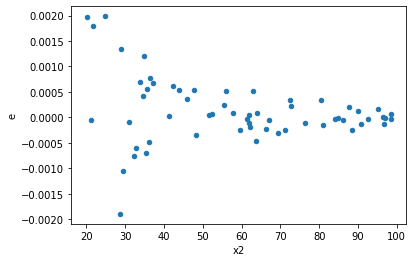

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,21.0,21.0,3.884775811570362e-06,1.755144428466972e-05,1.849893243604934e-07,8.357830611747486e-07,4.518006993452427,0.0010663527868988165,0.9994668236065506,0.0005331763934494083,Reject005=0 : Heteroscedasticity
11.0,21.0,21.0,5.074446768416432e-06,1.1630246428794995e-05,2.416403223055444e-07,5.538212585140474e-07,2.291924018433326,0.0639841529994234,0.9680079235002883,0.0319920764997117,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,1.7773027234354733e-05,2.3390051436442014e-05,8.463346302073682e-07,1.1138119731639055e-06,1.3160420635168861,0.5346992127768604,0.7326503936115698,0.2673496063884302,Reject005=1 : Homoscedasticity
14.0,21.0,21.0,7.191225507221455e-06,8.45608378278442e-06,3.4243930986768834e-07,4.026706563230676e-07,1.1758891129603417,0.7138761871129184,0.6430619064435408,0.3569380935564592,Reject005=1 : Homoscedasticity
45.0,21.0,21.0,1.939301654770437e-05,2.2461483032318873e-05,9.234769784621129e-07,1.0695944301104224e-06,1.1582253321481195,0.7395601461614012,0.6302199269192994,0.3697800730807006,Reject005=1 : Homoscedasticity
120.0,21.0,21.0,2.5359157496235132e-06,2.7212793070095025e-06,1.2075789283921492e-07,1.295847289052144e-07,1.0730953137593424,0.8731051267315566,0.5634474366342217,0.4365525633657783,Reject005=1 : Homoscedasticity
137.0,21.0,21.0,5.6878459450396065e-06,5.966481349628386e-06,2.708498069066479e-07,2.8411815950611365e-07,1.0489878606560676,0.9137726785972053,0.5431136607013973,0.4568863392986027,Reject005=1 : Homoscedasticity
140.0,21.0,21.0,3.874965429285343e-06,4.515038636211736e-06,1.8452216329930206e-07,2.1500183981960648e-07,1.1651816560965915,0.7293613777714207,0.6353193111142896,0.36468068888571037,Reject005=1 : Homoscedasticity
162.0,21.0,21.0,8.980158359309336e-06,2.4033238939131056e-05,4.276265885385398e-07,1.1444399494824312e-06,2.6762600365746168,0.028762696063241,0.9856186519683795,0.0143813480316205,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,2.072383382112488e-05,2.2985381007258452e-06,9.868492295773751e-07,1.094541952726593e-07,0.1109127838297384,4.539313245134121e-06,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,3.473749430349842e-05,1.0555672517446422e-05,1.6541663954046867e-06,5.026510722593534e-07,0.30386971568019394,0.008691295405861029,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1.83255427645702e-05,2.130079208076401e-06,8.726448935509619e-07,1.0143234324173337e-07,0.11623553176250814,6.780359815641956e-06,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,3.884775811570362e-06,1.755144428466972e-05,1.849893243604934e-07,8.357830611747486e-07,4.518006993452427,0.0010663527868988165,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1.5145261168702048e-05,7.530314387134785e-06,7.212029127953356e-07,3.585863993873707e-07,0.4972059777150832,0.11720254192696124,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,8.415961649467363e-06,1.2663594138251034e-06,4.007600785460649e-07,6.030282922976683e-08,0.1504711483452696,5.744334056771013e-05,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,1.7790146283009886e-05,4.835650834796582e-06,8.471498230004707e-07,2.3026908737126582e-07,0.27181624916793246,0.0043010932482874025,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,3.519237885831217e-05,6.856617307273383e-07,1.675827564681532e-06,3.265055860606373e-08,0.01948324475273118,2.7425852226730186e-13,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,1.104301282668196e-05,4.872678379571284e-06,5.258577536515218e-07,2.3203230378910877e-07,0.4412453789601687,0.06757222207630091,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    859
Reject005=1 : Homoscedasticity      141
Name: Result_test, dtype: int64